In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ref - https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

In [31]:
# import data
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# EDA

In [32]:
df.shape

(19158, 14)

In [33]:
df.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [34]:
# drop unnecessary columns
df.drop(['enrollee_id', 'city'], axis = 1, inplace=True)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Investigating Categorical Variables

### `gender`

In [35]:
# value_counts
df['gender'].value_counts(dropna = False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

Since `number of females << number of males`, we will convert this into a binary feature - **`Male_Yes`** and **`Male_No`**`

In [36]:
df['gender'] = df['gender'].map(lambda x : "Male_Yes" if x == 'Male' else "Male_No")
df['gender'].value_counts(dropna = False)

Male_Yes    13221
Male_No      5937
Name: gender, dtype: int64

### `relevant_experience`

In [37]:
# value_counts
df['relevent_experience'].value_counts(dropna = False)

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [38]:
# minimiozing values for relevent_experience
df['relevent_experience'] = df['relevent_experience'].map(lambda x : "Yes" if x == 'Has relevent experience' else "No")
df['relevent_experience'].value_counts(dropna = False)

Yes    13792
No      5366
Name: relevent_experience, dtype: int64

### Academics - `enrolled_university`, `education_level`, `major_discipline`

In [39]:
df.isna().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [40]:
# value_counts
df['enrolled_university'].value_counts(dropna = False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [41]:
df['education_level'].value_counts(dropna = False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [42]:
df['major_discipline'].value_counts(dropna = False)

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

- Let's check distribution of values when one of the three variables is NULL

In [43]:
for i in ['enrolled_university', 'education_level', 'major_discipline']:
    for j in ['enrolled_university', 'education_level', 'major_discipline']:
        if i != j:
            print("when %s is null" % (i))
            print(df.loc[df[i].isna(), j].value_counts(dropna = False))
            print()
        else:
            continue

when enrolled_university is null
Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

when enrolled_university is null
STEM               208
NaN                157
Humanities           9
Other                4
No Major             4
Arts                 2
Business Degree      2
Name: major_discipline, dtype: int64

when education_level is null
no_enrollment       270
NaN                 100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

when education_level is null
NaN    460
Name: major_discipline, dtype: int64

when major_discipline is null
no_enrollment       1481
Full time course     976
Part time course     199
NaN                  157
Name: enrolled_university, dtype: int64

when major_discipline is null
High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: 

when `enrolled_university` is NULL, `education_level` -


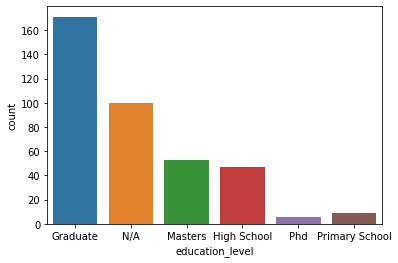


when `enrolled_university` is NULL, `major_discipline` -


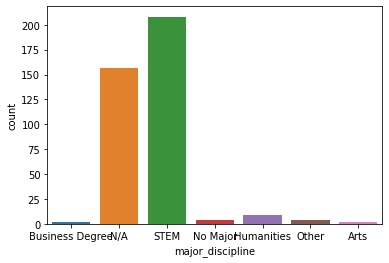


when `education_level` is NULL, `enrolled_university` -


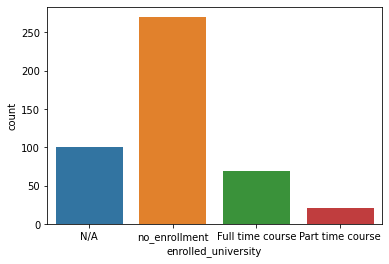


when `education_level` is NULL, `major_discipline` -


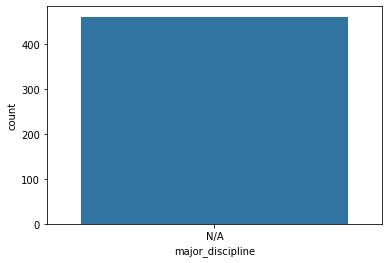


when `major_discipline` is NULL, `enrolled_university` -


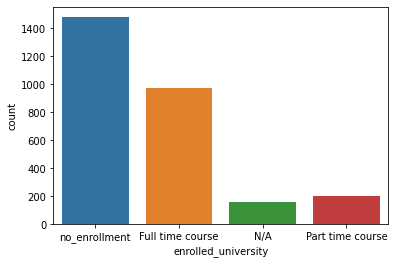


when `major_discipline` is NULL, `education_level` -


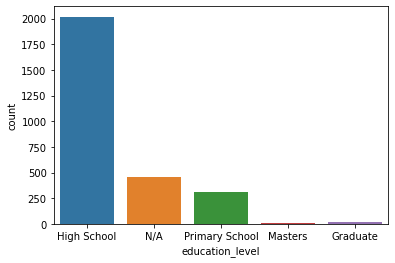

In [44]:
for i in ['enrolled_university', 'education_level', 'major_discipline']:
    for j in ['enrolled_university', 'education_level', 'major_discipline']:
        if i != j:
            print("when `%s` is NULL, `%s` -" % (i, j))
            sns.countplot(df.loc[df[i].isna(), j].fillna("N/A"))
            plt.show()
            print()
        else:
            continue

In [45]:
pd.crosstab(df['education_level'].fillna("N/A"), df['enrolled_university'].fillna("N/A"))

enrolled_university,Full time course,N/A,Part time course,no_enrollment
education_level,,,,
Graduate,2209,171,784,8434
High School,864,47,166,940
Masters,557,53,204,3547
N/A,69,100,21,270
Phd,25,6,12,371
Primary School,33,9,11,255


#### Observations - 
1. ***`enrolled_university`*** -  
- Majority of NULLS have **`education_level` == *graduation or higher*** , so we can assume that they did not enroll to any university course. Remaining values can be assumed as "not enrolled" too.  
- To further solidify our assumption, we will take a look at the crosstab above as well. We observe that `education_level` == NULL has maximum values against `enrolled_university` = "no enrollment". While, for `enrolled_university` == NULL has maximum values in `education_level` = "Graduate".

2. ***`education_level`*** - We plan to make this variable have 3 categories - "High School or Lower", "Graduation" and "Post Graduation". We can then club NULLS with "High School or Lower" category since their `major_discipline` is also NULL (heavy majority of the cases where `major_discipline` is NULL have `education_level` up to High School only). 

3. ***`major_discipline`*** - We plan to make this a binary variable - "STEM" and "Non-STEM". Now, heavy majority of the cases where Major Discipline is NULL have education up to High School only. So, we will simply put NULLS into "Non-STEM" category.

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

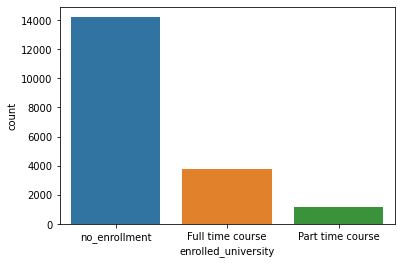

In [46]:
# enrolled_university
df['enrolled_university'] = df['enrolled_university'].fillna("no_enrollment")
sns.countplot(df['enrolled_university'])

- The variable `enrolled_university` is also extremely skewed which is why we will merge "Full Time" and "Part Time" into one category i.e. **enrolled**.

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

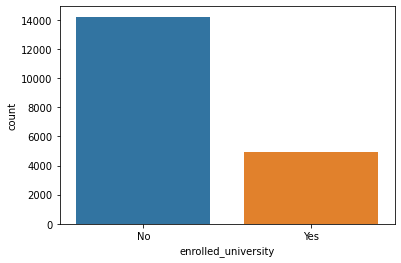

In [48]:
df['enrolled_university'] = df['enrolled_university'].map(lambda x : "No" if x == "no_enrollment" else "Yes")
sns.countplot(df['enrolled_university'])

In [52]:
# education_level
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [60]:
def education(x):
    if x in ['Masters', 'Phd']:
        return "Post Graduate"
    elif x == "Graduate":
        return "Graduate"
    else:
        return "Non-Graduate"

<AxesSubplot:xlabel='education_level', ylabel='count'>

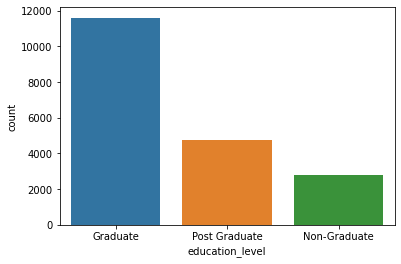

In [62]:
df['education_level'] = df['education_level'].map(education)
sns.countplot(df['education_level'])

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

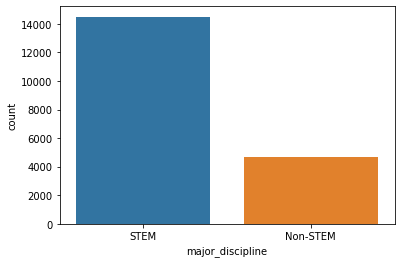

In [63]:
# major_discipline
df['major_discipline'] = df['major_discipline'].map(lambda x : "STEM" if x == "STEM" else "Non-STEM")
sns.countplot(df['major_discipline'])

### `experience` and `last_new_job`

- We will investigate these variables together because they may be explanatory of each other (explain NULLS/Zeros in experience).

In [67]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male_Yes,Yes,No,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male_Yes,No,No,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,Male_No,No,Yes,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,Male_No,No,No,Graduate,Non-STEM,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male_Yes,Yes,No,Post Graduate,STEM,>20,50-99,Funded Startup,4,8,0.0


In [66]:
# value_counts
df['experience'].value_counts(dropna = False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64